# DTSC 710 Homework 4: Image Classification

Selina Narain

ID 1261565

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import keras
from keras.datasets import mnist

2023-04-28 18:57:38.610124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
np.random.seed(2023)

#we will load data into our x_train, y_train, x_test, y_test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## DATA PREPROCESSING (60 POINTS):

● Generate the first 5 images of x_train using plt.imshow to see what we are working with

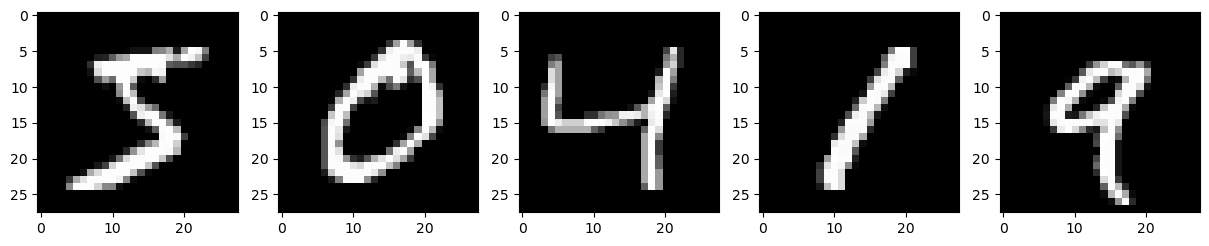

In [4]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Iterate and plt first 5 images
for i in range(5):
    axes[i].imshow(x_train[i], cmap=plt.get_cmap('gray'))
    #axes[i].axis('off')

● Flatten the inputs from each row being 28 by 28 (each row is a np.array of 28 vectors with 28 values in each vector) to 784

● Final output for x_train should be (60000,784), and y_train should be (60000,)

● Be sure to convert the datatype to float

● Normalize the ranges of values from 0-255 to a value between 0-1 by dividing the entire dataset by 255 except for the labels

In [5]:
# Printing shape of training and testing data
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [6]:
#model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28))])

In [7]:
# Flattening the train and test data, convert data type to float
x_train = x_train.astype(np.float32).reshape(-1, 28*28) / 255.0
x_test = x_test.astype(np.float32).reshape(-1, 28*28) / 255.0

In [8]:
# Re-printing shape of training and testing data after flattening
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)


## MODEL TRAINING(40 POINTS):

The baseline for this model is 96% accuracy. Use any algorithm we have covered in the course, including ensembling and gridsearchCV, to create an MNIST image classifier that can beat 96% accuracy. If your model can not do better than 96% accuracy, you will only get half the credit for this part. Show accuracy and confusion matrix for all the models you have attempted. Which model performed the best for this problem?

Random Forest Classifier Model

In [9]:
rfc=RandomForestClassifier(n_estimators=100, random_state=42)

# Train model on training set
rfc.fit(x_train,y_train)

# Predict the response for test dataset
y_pred = rfc.predict(x_test)

In [10]:
# Classification Report
print ("Classification Report\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print ("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# Model Accuracy
print("Random Forest Classifier Base Model Accuracy:", accuracy_score(y_test, y_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix:

[[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5    0]
 [   1    0    9  972    0    9    0    

Random Forest Grid Search Model

In [11]:
rfc=RandomForestClassifier()

# Hyperparameters for grid search
rfc_grid = {'n_estimators': [50, 100, 200], 
            'max_depth': [None, 10, 20], 
            'min_samples_split': [2, 4, 8],
            'min_samples_leaf': [1, 2, 4]}

# Grid search to find best parameters
rfc_grid = GridSearchCV(rfc, rfc_grid, verbose=5)

# Train  model on training set
rfc_grid.fit(x_train,y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.965 total time=  10.5s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.962 total time=   9.9s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.961 total time=  10.8s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.961 total time=   9.7s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.968 total time=  10.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.966 total time=  20.7s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.967 total time=  19.7s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.964 to

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100, 200]},
             verbose=5)

In [12]:
# View the best parameters
rfc_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [13]:
# Predict the response for test dataset
rfc_grid_pred = rfc_grid.predict(x_test)

In [14]:
# Classification Report
print ("Classification Report\n")
print(classification_report(y_test, rfc_grid_pred))

# Confusion Matrix
print ("Confusion Matrix:\n")
print(confusion_matrix(y_test, rfc_grid_pred))

# Model Accuracy
print("Random Forest Classifier Grid Accuracy:", accuracy_score(y_test, rfc_grid_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix:

[[ 970    0    1    0    0    2    3    1    3    0]
 [   0 1123    1    4    0    1    3    0    2    1]
 [   6    0  996    7    4    0    3    9    7    0]
 [   0    0   10  974    0    6    0    

SVM Model

In [15]:
# Building a Support Vector Machine on train data with linear kernel
svc_linear = SVC(C=.1, kernel='linear', gamma=1)

# Train model on training set
svc_linear.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = svc_linear.predict(x_test)

In [16]:
# Classification Report
print ("Classification Report\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print ("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# Model Accuracy
print("SVM Base Model Accuracy:", accuracy_score(y_test, y_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.91      0.94      0.93      1010
           4       0.94      0.96      0.95       982
           5       0.92      0.90      0.91       892
           6       0.96      0.96      0.96       958
           7       0.95      0.94      0.95      1028
           8       0.94      0.91      0.92       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Confusion Matrix:

[[ 967    0    2    1    1    6    1    1    1    0]
 [   0 1124    2    2    0    1    2    1    3    0]
 [   9    2  974   10    5    2    8    8   14    0]
 [   2    0   14  953    0   16    0   1

In [17]:
# Building a Support Vector Machine on train data with rbf kernel
svc_linear = SVC(C=.1, kernel='rbf', gamma=1)

# Train model on training set
svc_linear.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = svc_linear.predict(x_test)

In [18]:
# Classification Report
print ("Classification Report\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print ("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# Model Accuracy
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000

Confusion Matrix:

[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    

/Users/selinanarain/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/selinanarain/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/selinanarain/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

SVM GridSearchCV

In [19]:
svc = SVC()

In [20]:
# Hyperparameters for grid search
svc_grid = {'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf']} 

# Grid search to find best parameters 
svc_grid = GridSearchCV(svc, svc_grid, refit = True, verbose = 3)
  
# Train the model for grid search
svc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.946 total time= 2.2min
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.939 total time= 2.1min
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.939 total time= 2.1min
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.936 total time= 2.1min
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.945 total time= 2.2min
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.957 total time= 6.4min
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.954 total time= 6.5min
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.951 total time= 6.2min
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.952 total time= 6.2min
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.959 total time= 6.3min
[CV 1/5] END ................C=1, kernel=linear;, score=0.938 total time= 2.6min
[CV 2/5] END ................C=1, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
             verbose=3)

In [21]:
# View the best parameters
print(svc_grid.best_params_)
  
print(svc_grid.best_estimator_)

{'C': 10, 'kernel': 'rbf'}
SVC(C=10)


In [22]:
# Predict the response for test dataset
svc_grid_pred = svc_grid.predict(x_test)

In [23]:
# Classification Report
print ("Classification Report\n")
print(classification_report(y_test, svc_grid_pred))

# Confusion Matrix
print ("Confusion Matrix:\n")
print(confusion_matrix(y_test, svc_grid_pred))

# Model Accuracy
print("SVM Grid Model Accuracy:", accuracy_score(y_test, svc_grid_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix:

[[ 973    0    2    0    0    2    0    1    2    0]
 [   0 1129    2    1    0    1    0    1    1    0]
 [   5    1 1014    0    1    0    1    6    4    0]
 [   0    0    2  996    0    2    0    

### Which model performed the best for this problem?

The first model I completed was the random forest classsifier with n_estimators=100 which performed at around 97% accuracy. Then, once doing a grid search with random forest classifier, we can see that the best parameters for the random foresst classifier was: 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, and 'n_estimators': 200 which produced an accuracy of around 97% as well. I also did another model which is an SVC model. As base models, I did the 'linear' and kernel which produced about a 95% accuracy. I also did grid search on the SVC model which gave the best parameters as 'C': 10 and 'kernel': 'rbf', giving an accuracy of 98% -- which is the model that performed best. 